<a href="https://colab.research.google.com/github/SanjayS2348553/Reinforcement-Learning/blob/main/2348553_SANJAY_S_RL_Lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt


**Define the Grid-World**

In [2]:
class GridWorld:
    def __init__(self):
        self.grid = np.zeros((3, 4))
        self.grid[0, 3] = 1  # Terminal state reward
        self.start = (2, 0)
        self.terminal = (0, 3)
        self.blocked = (1, 1)
        self.actions = ['up', 'down', 'left', 'right']
        self.state = self.start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        i, j = self.state
        if self.state == self.terminal:
            return self.state, 0, True  # No further action from terminal state

        # Determine the next state
        if action == 'up' and i > 0:
            next_state = (i - 1, j)
        elif action == 'down' and i < 2:
            next_state = (i + 1, j)
        elif action == 'left' and j > 0:
            next_state = (i, j - 1)
        elif action == 'right' and j < 3:
            next_state = (i, j + 1)
        else:
            next_state = self.state  # No movement if action leads out of bounds

        # Check for blocked cell
        if next_state == self.blocked:
            next_state = self.state

        # Define rewards
        if next_state == self.terminal:
            reward = 1
        else:
            reward = 0

        self.state = next_state
        done = self.state == self.terminal
        return next_state, reward, done


**Temporal Difference (TD) Learning**

In [3]:
class TD_Learning_Agent:
    def __init__(self, gridworld, alpha=0.1, gamma=0.9):
        self.env = gridworld
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.V = np.zeros_like(gridworld.grid)  # State-value table

    def choose_action(self):
        return np.random.choice(self.env.actions)  # Random policy for simplicity

    def update_value(self, state, next_state, reward):
        i, j = state
        next_i, next_j = next_state
        td_target = reward + self.gamma * self.V[next_i, next_j]
        td_error = td_target - self.V[i, j]
        self.V[i, j] += self.alpha * td_error

    def train(self, episodes=100):
        for episode in range(episodes):
            state = self.env.reset()
            done = False

            while not done:
                action = self.choose_action()
                next_state, reward, done = self.env.step(action)
                self.update_value(state, next_state, reward)
                state = next_state


**Visualization**

In [4]:
def visualize_value_function(V):
    plt.imshow(V, cmap='coolwarm', interpolation='nearest')
    for i in range(V.shape[0]):
        for j in range(V.shape[1]):
            plt.text(j, i, f"{V[i, j]:.2f}", ha='center', va='center', color='black')
    plt.colorbar()
    plt.title("State-Value Function")
    plt.show()


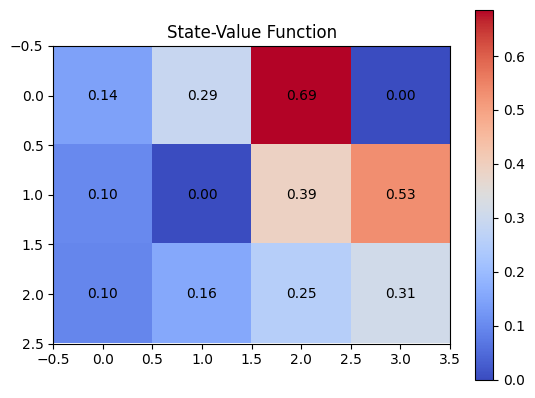

In [5]:
if __name__ == "__main__":
    gridworld = GridWorld()
    agent = TD_Learning_Agent(gridworld)

    # Train the agent
    agent.train(episodes=1000)

    # Visualize the learned value function
    visualize_value_function(agent.V)
